In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
x0=0.25
p0=0.05
hbar=0.004
re_co=x0/np.sqrt(2*hbar)
im_co=p0/np.sqrt(2*hbar)
N=50
psi0=coherent(N,re_co+1j*im_co)

In [2]:
H0=hbar*(num(N)+0.5*qeye(N))+(hbar**2/16)*(create(N)+destroy(N))**4
H1=-1*np.sqrt(hbar/2)*(create(N)+destroy(N))
H0=H0/hbar
H1=H1/hbar

In [3]:
F=0.015
w=1.064
gamma=0.01
T=2*np.pi/w
args={'F':F,'w':w}
kT=2*hbar
nbar=1/(np.exp(hbar/kT)-1)
print(nbar)

1.5414940825367982


In [4]:
H=[H0,[H1,'F*cos(w*t)']]

In [5]:
times=np.arange(0,300*T,0.1)

In [6]:
result=mesolve(H,psi0,times,[np.sqrt(gamma*(1+nbar))*destroy(N),np.sqrt(gamma*nbar)*create(N)],[],args=args,progress_bar=True)

10.0%. Run time:   4.94s. Est. time left: 00:00:00:44
20.0%. Run time:   9.86s. Est. time left: 00:00:00:39
30.0%. Run time:  14.76s. Est. time left: 00:00:00:34
40.0%. Run time:  19.42s. Est. time left: 00:00:00:29
50.0%. Run time:  24.66s. Est. time left: 00:00:00:24
60.0%. Run time:  29.86s. Est. time left: 00:00:00:19
70.0%. Run time:  34.76s. Est. time left: 00:00:00:14
80.0%. Run time:  39.73s. Est. time left: 00:00:00:09
90.0%. Run time:  45.09s. Est. time left: 00:00:00:05
Total run time:  50.07s


In [7]:
xvec=np.linspace(-0.5,0.5,100)
gv=np.sqrt(2/hbar)

In [8]:
W=wigner(result.states[-1],xvec,xvec,g=gv)

In [9]:
import matplotlib as mpl
from matplotlib import cm
from textwrap import wrap


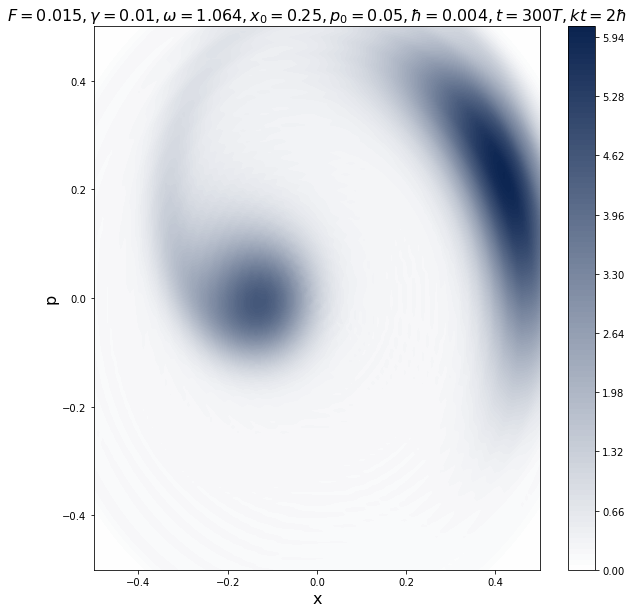

In [10]:
wmap=wigner_cmap(W)
nrm = mpl.colors.Normalize(-W.max(), W.max())
mpl.rc('axes', titlesize=16)
mpl.rc('axes', labelsize=16)
plt.figure(figsize=(10,10))
plt.contourf(xvec,xvec,W,100,cmap=wmap)
plt.colorbar()
#plt.hlines(0.154669,-0.5,0.430339)
#plt.hlines(0.0139,-0.5,-0.13546)
#plt.vlines(0.430339,-0.5,0.154669)
#plt.vlines(-0.13546,-0.5,0.0139)
#plt.text(0.4,0.16,'High',fontsize=20)
#plt.text(-0.13546,0.0139,'Low',fontsize=20)
plt.title(r'$F=0.015,\gamma=0.01,\omega=1.064,x_0=0.25,p_0=0.05,\hbar=0.004,t=300T,kt=2\hbar$')
plt.xlabel('x')
plt.ylabel('p')
plt.savefig('C:/Users/Sudipta Nayak/Pictures/wigner_2hbartemp_w=1.064_T=300_N=50.png')
plt.show()

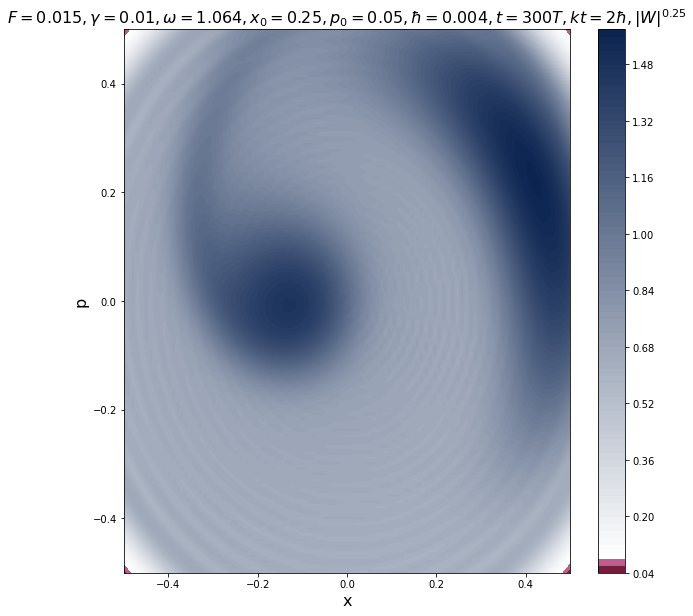

In [11]:
data=np.multiply(np.sign(W),np.power(np.abs(W),0.25))
wmap=wigner_cmap(data)
nrm = mpl.colors.Normalize(-data.max(), data.max())
mpl.rc('axes', titlesize=16)
mpl.rc('axes', labelsize=16)
plt.figure(figsize=(10,10))
plt.contourf(xvec,xvec,data,100,cmap=wmap)
plt.colorbar()
#plt.hlines(0.154669,-0.5,0.430339)
#plt.hlines(0.0139,-0.5,-0.13546)
#plt.vlines(0.430339,-0.5,0.154669)
#plt.vlines(-0.13546,-0.5,0.0139)
#plt.text(0.4,0.16,'High',fontsize=20)
#plt.text(-0.13546,0.0139,'Low',fontsize=20)
plt.title(r'$F=0.015,\gamma=0.01,\omega=1.064,x_0=0.25,p_0=0.05,\hbar=0.004,t=300T,kt=2\hbar, |W|^{0.25}$')
plt.xlabel('x')
plt.ylabel('p')
plt.savefig('C:/Users/Sudipta Nayak/Pictures/wigner_2hbartemp_w=1.064_T=300_N=50_powerquartered.png')

plt.show()

In [12]:
minneg=0
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        if W[i,j]<minneg:
            minneg=W[i,j]
            
print(minneg)

minneg_quarter=0
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        if data[i,j]<minneg:
            minneg_quarter=data[i,j]
            
print(minneg_quarter)

0
0


In [13]:
xvec=np.linspace(-0.7,0.7,1001)

In [14]:
W=wigner(result.states[-1],xvec,xvec,g=gv)

In [15]:
from scipy.integrate import simps

In [16]:
Px_vector=np.zeros(len(xvec))
for i in range(len(Px_vector)):
    Px_vector[i]=simps(W[:,i],xvec)
    


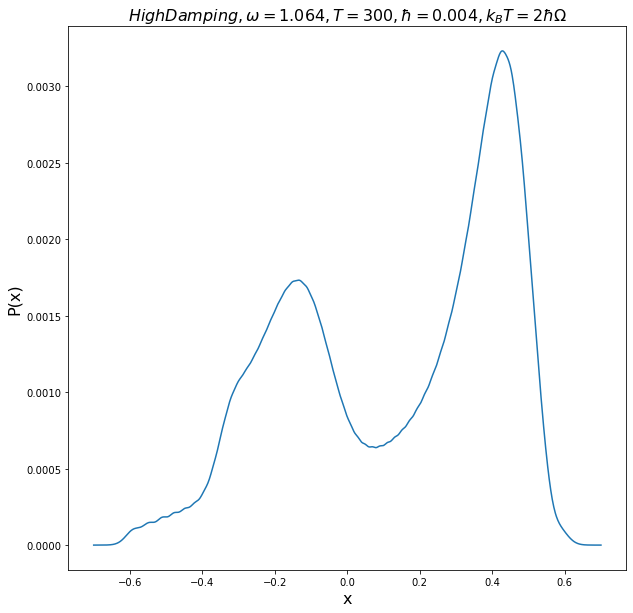

In [17]:
Px=Px_vector/np.sum(Px_vector)
plt.figure(figsize=(10,10))
plt.plot(xvec,Px)
plt.xlabel('x')
plt.ylabel('P(x)')
plt.title(r"$HighDamping,\omega=1.064, T=300,\hbar=0.004, k_BT=2\hbar\Omega $")
plt.savefig('C:/Users/Sudipta Nayak/Pictures/Px_2hbartemp_w=1.064_T=300_N=50.png')

In [20]:
a=np.sum(Px)
print(a)

1.0
